# TELCO CHURN

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:

#Read data
data = pd.read_csv("D:/ZENIUS/DATASET/telco_churn.csv")
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## INFO 

In [75]:
#nfo sebuah tipe data,kolom data, banyak nya data dll
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Check Missing Value

In [76]:
# sum null value
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [77]:
## convert feature totalcharges to float
data.TotalCharges = data['TotalCharges'].replace(' ', '0', regex=True)
data.TotalCharges = pd.to_numeric(data.TotalCharges)


In [78]:
#Mengubah nilai Senior citizen menjadi object
data['SeniorCitizen']= data['SeniorCitizen'].astype('object')

In [79]:
#drop column customer ID
data=data.drop(columns=['customerID'])

In [80]:
#Summerize data
data.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304
std,24.559481,30.090047,2266.794470
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


## Correlation of feature

In [81]:
#get dummy to transform data
data_dum = pd.get_dummies(data,drop_first=True)

data_dum

c:\Users\kevin\anaconda3\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,1,29.85,29.85,0,0,1,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
1,34,56.95,1889.50,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,2,53.85,108.15,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,1
3,45,42.30,1840.75,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,2,70.70,151.65,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,24,84.80,1990.50,1,0,1,1,1,0,1,...,1,0,1,1,0,1,0,0,1,0
7039,72,103.20,7362.90,0,0,1,1,1,0,1,...,1,0,1,1,0,1,1,0,0,0
7040,11,29.60,346.45,0,0,1,1,0,1,0,...,0,0,0,0,0,1,0,1,0,0
7041,4,74.40,306.60,1,1,1,0,1,0,1,...,0,0,0,0,0,1,0,0,1,1


In [82]:
#correlation

# 0 no correlation
# 1 positive correlation
# -1 negative correlation
data_cor = data_dum.corr()['Churn_Yes'].sort_values().reset_index()
data_cor

,index,Churn_Yes
0,tenure,-0.352229
1,Contract_Two year,-0.302253
2,OnlineBackup_No internet service,-0.227890
3,OnlineSecurity_No internet service,-0.227890
4,InternetService_No,-0.227890
5,TechSupport_No internet service,-0.227890
6,StreamingMovies_No internet service,-0.227890
7,StreamingTV_No internet service,-0.227890
8,DeviceProtection_No internet service,-0.227890
9,TotalCharges,-0.198324


## Visualisasi

<AxesSubplot:xlabel='Churn', ylabel='count'>

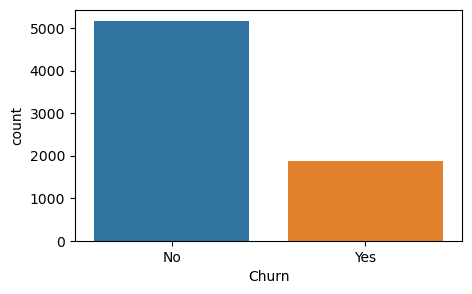

In [83]:
## jumlah churn yes dan no
plt.figure(figsize=(5,3))
sns.countplot(data=data,x="Churn")

<AxesSubplot:xlabel='gender', ylabel='count'>

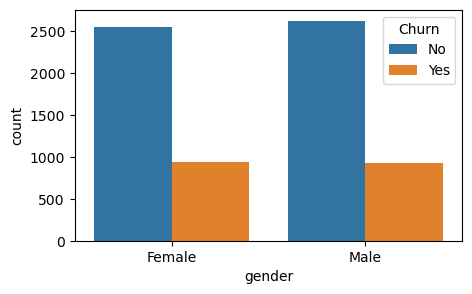

In [84]:
#apakah churn dipengaruhi gender?
# jawabanya tidak , berdasar countplot dibawah menunjukan churn tidak ada hubungan nyaa dengan gender karena perbedaan nya kecil
plt.figure(figsize=(5,3))
sns.countplot(data=data,x='gender',hue='Churn')

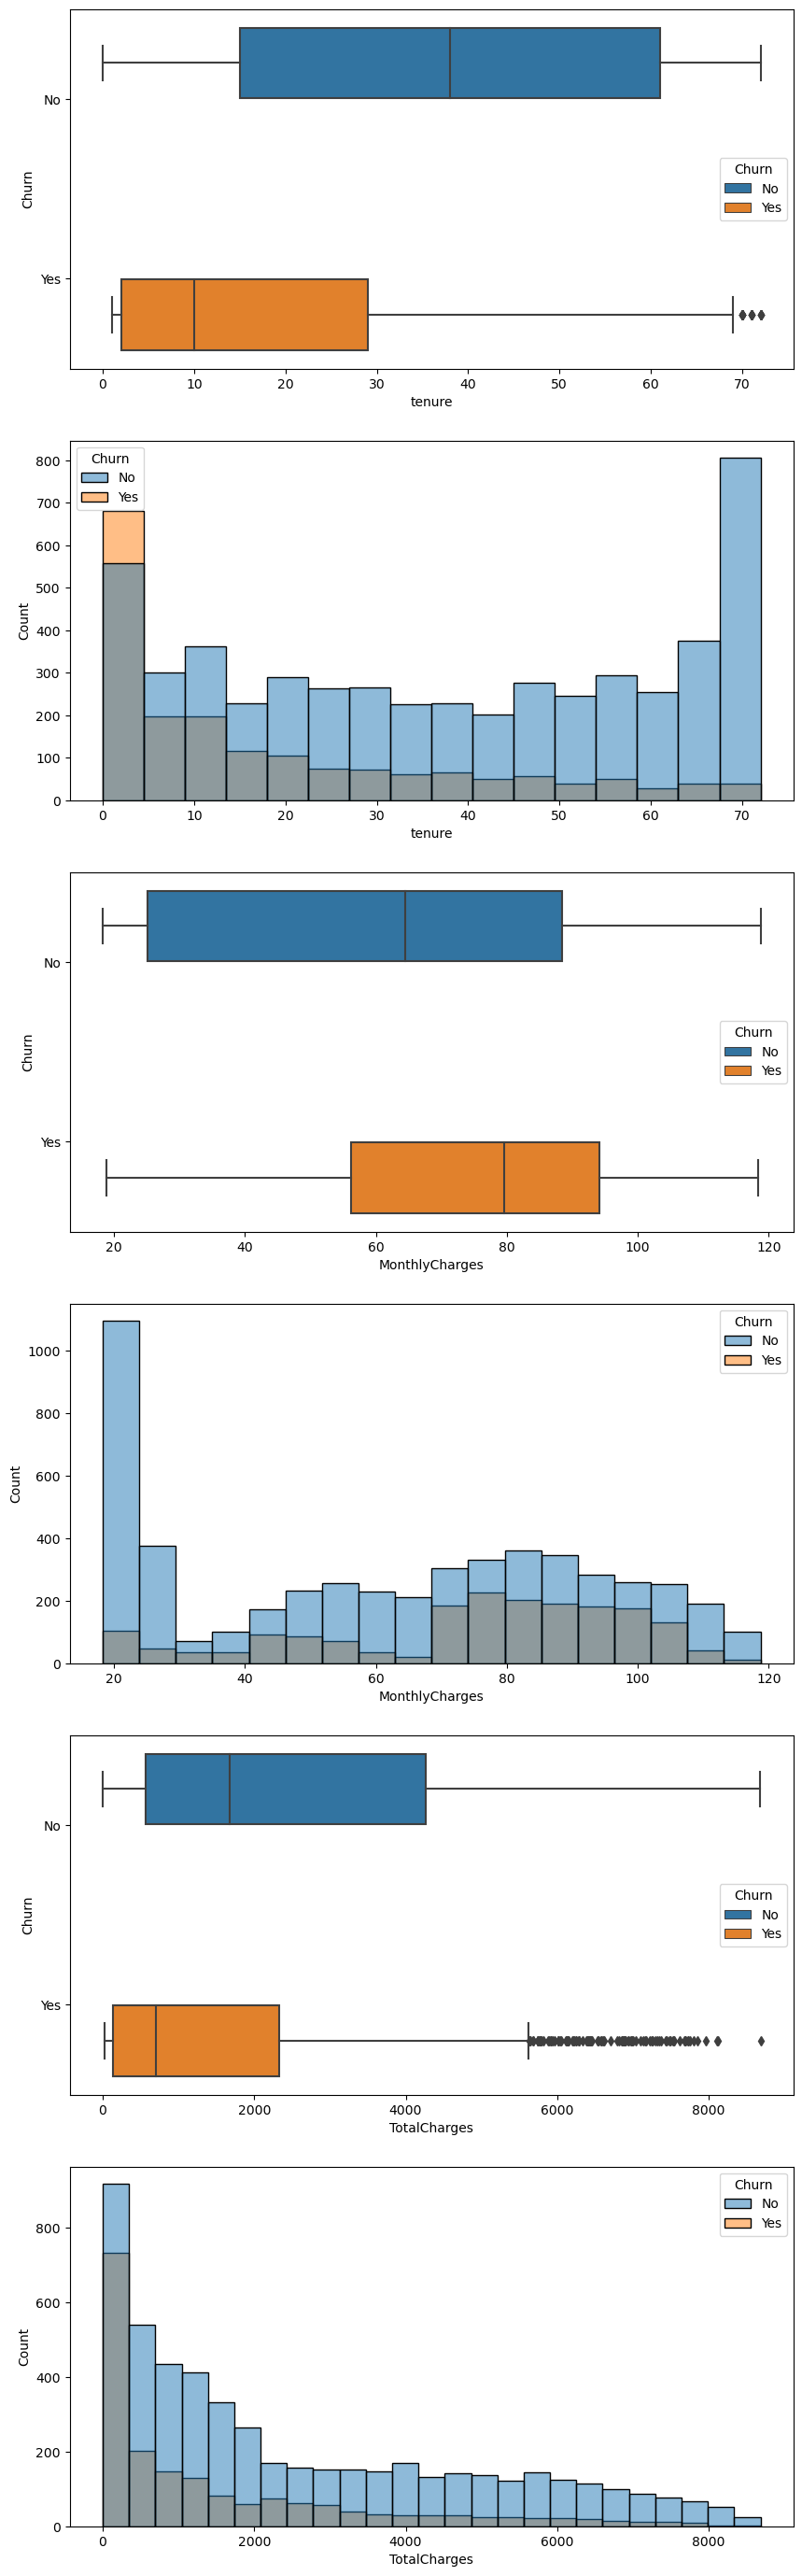

In [85]:
fig, ax = plt.subplots(6,figsize=(10, 35))
# sns.set(font_scale=2)

#tenure terhadap churn 
#dapat disimpulkan bahwa tenure rendah memiliki lebih banyak churn Yes
g=sns.boxplot(data=data, x="tenure", y="Churn", ax=ax[0], hue="Churn")
g=sns.histplot(data=data, x="tenure", ax=ax[1], hue="Churn")

# #monthly charges terhadap churn
# #Monthly charges rendah menunjukan bahwa banyak yang tidak churn
g=sns.boxplot(data=data, x="MonthlyCharges", y="Churn", ax=ax[2], hue="Churn")
g=sns.histplot(data=data, x="MonthlyCharges", ax=ax[3], hue="Churn")

# #Total charges terhadap churn
# # Menunjukan total charge rendah (sekitar 0-2000an) sering churn 
g=sns.boxplot(data=data, x="TotalCharges", y="Churn", ax=ax[4], hue="Churn")
g=sns.histplot(data=data, x="TotalCharges", ax=ax[5], hue="Churn")

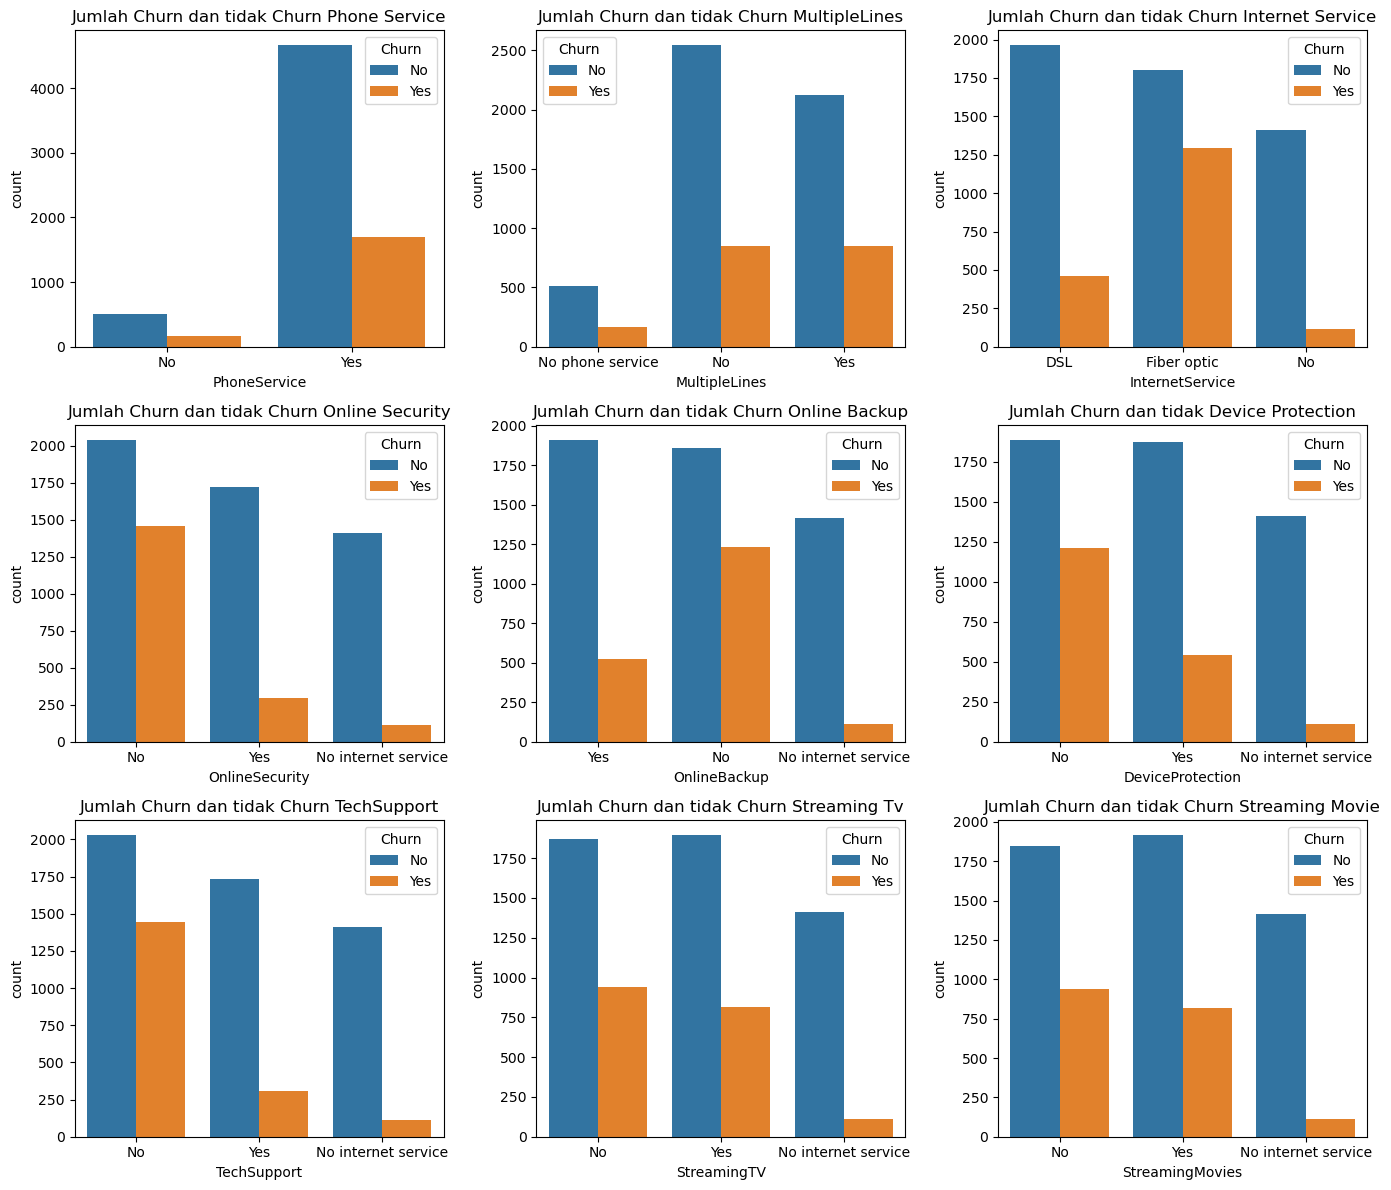

In [86]:
#Service Information: PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(14,12))

#Pengguna phone service lebih banyak churn namun banyak yang tidak churn
sns.countplot(x="PhoneService", hue="Churn", data=data, ax=axes[0,0]).set(title='Jumlah Churn dan tidak Churn Phone Service')

#Pengguna No MultipleLines dan Multiplelines nilai churn nya sama
sns.countplot(x="MultipleLines", hue="Churn", data=data, ax=axes[0,1]).set(title='Jumlah Churn dan tidak Churn MultipleLines')

#jumlah churn Pemilik fiber optic lebih banyak dari yang lain
sns.countplot(x="InternetService", hue="Churn", data=data, ax=axes[0,2]).set(title='Jumlah Churn dan tidak Churn Internet Service')

#Pengguna No Online security lebih banyak churn dibanding yang lain
sns.countplot(x="OnlineSecurity", hue="Churn", data=data, ax=axes[1,0]).set(title='Jumlah Churn dan tidak Churn Online Security')

#Pengguna No Online Backup lebih banyak churn dibanding yang lain
sns.countplot(x="OnlineBackup", hue="Churn", data=data, ax=axes[1,1]).set(title='Jumlah Churn dan tidak Churn Online Backup')

#Pengguna No Device Protection lebih banyak churn dibanding yang lain
sns.countplot(x="DeviceProtection", hue="Churn", data=data, ax=axes[1,2]).set(title='Jumlah Churn dan tidak Device Protection')

#Pengguna No TechSupport lebih banyak churn dibanding yang lain
sns.countplot(x="TechSupport", hue="Churn", data=data, ax=axes[2,0]).set(title='Jumlah Churn dan tidak Churn TechSupport')

#Pengguna No Streaming Tv lebih banyak churn namun memiliki selisih sedikit dengan pengguna Streaming TV
sns.countplot(x="StreamingTV", hue="Churn", data=data, ax=axes[2,1]).set(title='Jumlah Churn dan tidak Churn Streaming Tv')

#Pengguna No Streaming Movie lebih banyak churn namun memiliki selisih sedikit dengan pengguna Streaming Movie
sns.countplot(x="StreamingMovies", hue="Churn", data=data, ax=axes[2,2]).set(title='Jumlah Churn dan tidak Churn Streaming Movie')

plt.tight_layout()
plt.show()

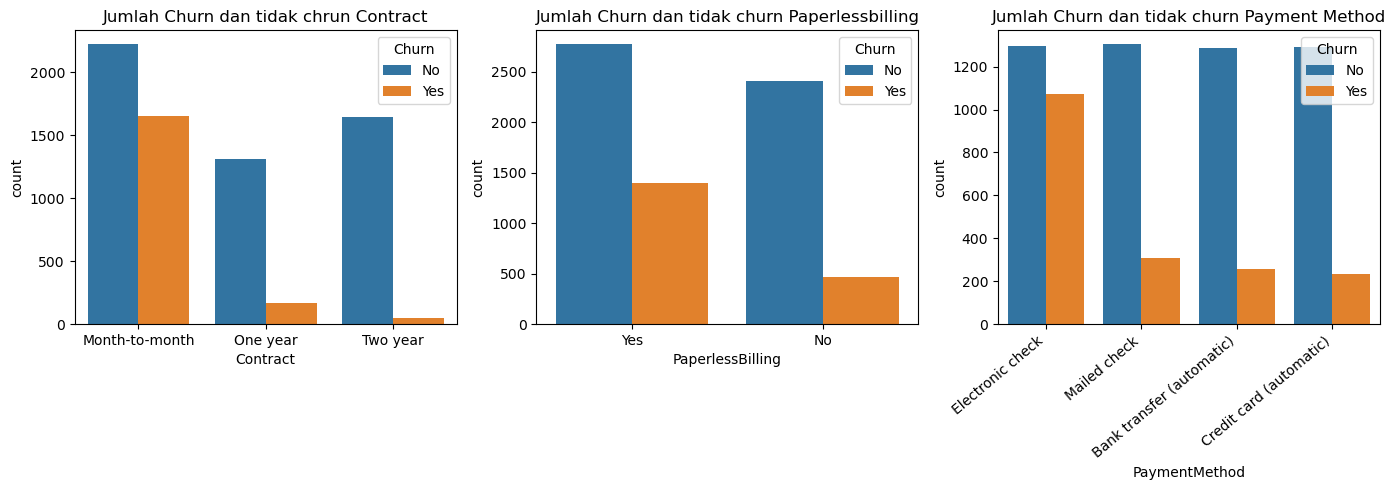

In [91]:
## Account Information: tenure, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(14,5))

#contract berpengaruh terhadap churn 
#langanan bulan ke bulan lebih banyak tidak churn tetapi yang churn selisih nya tidak jauh
#Selisih tidak churn pada 2 year contract sangat jauh
sns.countplot(x="Contract",hue="Churn", data=data, ax=axes[0]).set(title='Jumlah Churn dan tidak chrun Contract')

# Pengguna paperlessbilling churn selisihnya setengah dari yang tidak churn
# yang tidak paperlessbilling perbedaan jauh dengan churn dan yang tidak churn
sns.countplot(x="PaperlessBilling", hue="Churn", data=data, ax=axes[1]).set(title='Jumlah Churn dan tidak churn Paperlessbilling')

#Payment method yang digunakan pelanggan churn lebih banyak electronic check ketimbang yang lain
sns.countplot(x="PaymentMethod", hue="Churn", data=data, ax=axes[2]).set(title='Jumlah Churn dan tidak churn Payment Method')
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=40, ha="right")

plt.tight_layout()
plt.show()